# Bankit con SQLite

In [8]:
import sqlite3, pandas , matplotlib.pyplot as plt, seaborn as sns, os, pandas as pd
os.chdir('D:/files/csv/Bankit')
conn = sqlite3.connect("D:/files/csv/Bankit/Bankit.db")

## **TDB20295**

In [68]:
sql = """SELECT data_oss, ENTE_SEGN, LOC_CTP, set_ctp, valore, b.descrizione NUT,c.descrizione target FROM TDB20295 a \
left JOIN DOMAIN_STAMEN b ON a.LOC_CTP = b.Elemento left JOIN DOMAIN_STAMEN c ON a.set_CTP = c.Elemento \
where DATA_OSS > '2020-01-01 00:00:00' order by 1"""
df = pandas.read_sql(sql, conn)
df['DATA_OSS'] = pd.to_datetime(df['DATA_OSS'])

area =df.query('LOC_CTP.str.contains("ITF") and SET_CTP == "SBI25"')[['DATA_OSS','NUT','VALORE']]
#Umbria.query('NUT =="Umbria"').sort_values(by = 'DATA_OSS', ascending = False)

C:\Users\PVolterr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PVolterr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PVolterr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PVolterr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075

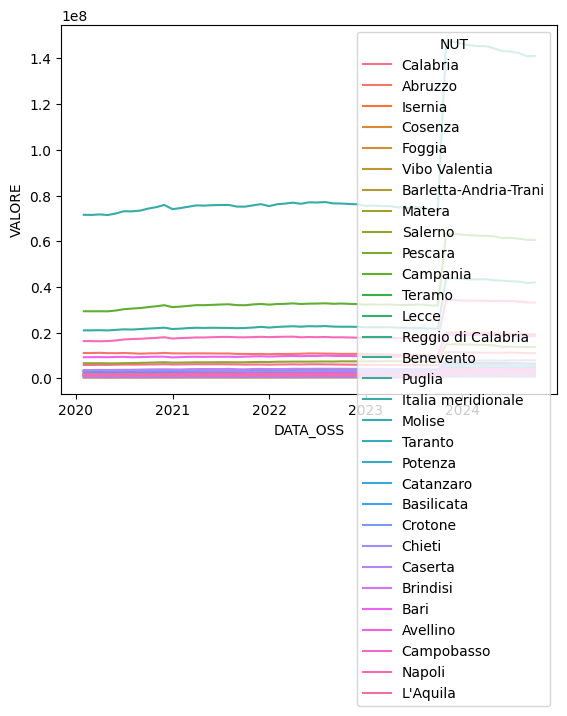

In [69]:
sns.lineplot(x = "DATA_OSS", y = "VALORE", hue = "NUT", data = area);

In [70]:
area

,DATA_OSS,NUT,VALORE
35,2020-01-31,Calabria,5841016.0
44,2020-01-31,Abruzzo,11080835.0
186,2020-01-31,Isernia,388075.0
197,2020-01-31,Cosenza,2179939.0
272,2020-01-31,Foggia,3206372.0
...,...,...,...
166730,2024-09-30,Cosenza,4233104.0
166746,2024-09-30,Pescara,4670490.0
166786,2024-09-30,L'Aquila,2893489.0
167003,2024-09-30,Taranto,4708485.0


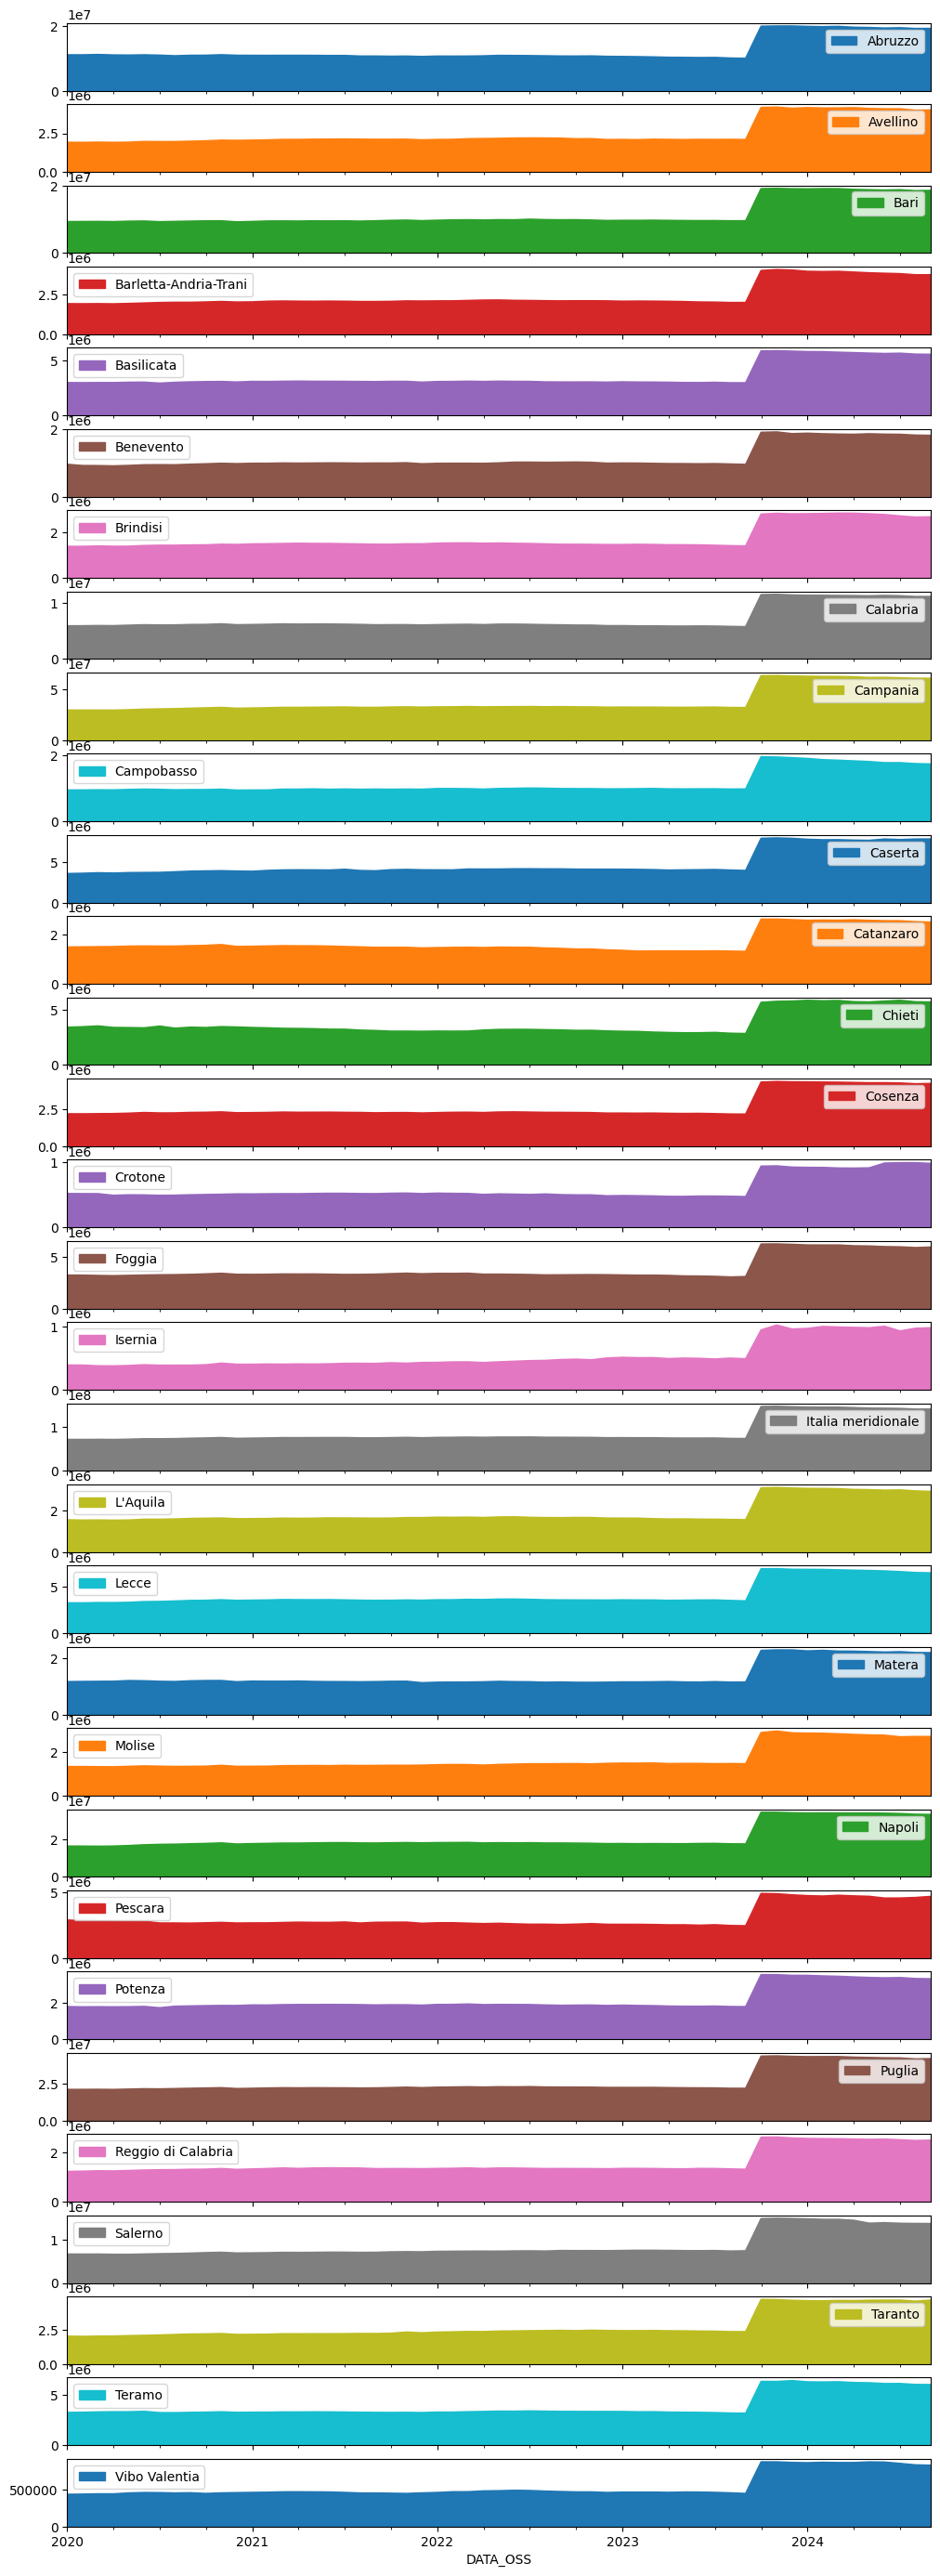

In [71]:
df_pivot  = area.pivot(index="DATA_OSS", columns="NUT", values="VALORE").reset_index()
axs = df_pivot.plot.area(x="DATA_OSS", figsize=(12, 35), subplots=True, legend=True)
plt.show()

## **TFR20231**

In [40]:
sql = """SELECT data_oss, ENTE_SEGN, LOC_CTP, set_ctp, valore, b.descrizione NUT,c.descrizione target FROM TFR20231 a \
left JOIN DOMAIN_STAMEN b ON a.LOC_CTP = b.Elemento left JOIN DOMAIN_STAMEN c ON a.set_CTP = c.Elemento order by 1 desc"""
df = pandas.read_sql(sql, conn)
df['DATA_OSS'] = pd.to_datetime(df['DATA_OSS'])

Umbria =df.query('LOC_CTP.str.contains("ITI2") and SET_CTP == "SBI25"')[['DATA_OSS','NUT','VALORE']]
Umbria.query('NUT =="Umbria"').sort_values(by = 'DATA_OSS', ascending = False).head()

,DATA_OSS,NUT,VALORE
101,2024-06-30,Umbria,-3.7
166,2024-03-31,Umbria,-3.5
336,2023-12-31,Umbria,-4.6
526,2023-09-30,Umbria,-8.2
574,2023-06-30,Umbria,-6.0
